# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [32]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import matplotlib

%matplotlib inline

In [33]:
import hvplot.pandas

## Load Data

In [34]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [35]:
# Calculate the number of dwelling types units per year (hint: use groupby and sum)
toronto_neighbourhood_data = to_data.groupby('year').sum()

toronto_neighbourhood_data

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040,40583604,118563,152031
2006,266860,379400,165,69430,54690,44095,162850,1335,59368353,184352,129558
2011,274940,429220,100,72480,60355,44750,163895,2165,74259461,202750,142771
2016,269680,493270,95,71200,61565,48585,165575,2845,92969566,246584,175885


In [36]:
# Save the dataframe as a csv file
toronto_neighbourhood_data.to_csv('dwelling_types_per_year.csv')

toronto_neighbourhood_data.columns

Index(['single_detached_house', 'apartment_five_storeys_plus',
       'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex',
       'apartment_five_storeys_less', 'other_house', 'average_house_value',
       'shelter_costs_owned', 'shelter_costs_rented'],
      dtype='object')

In [37]:
# Create a bar chart per year to show the number of dwelling types

dwelling_types_per_year = toronto_neighbourhood_data.drop(
    columns=['average_house_value','shelter_costs_owned','shelter_costs_rented'])
dwelling_types_per_year

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


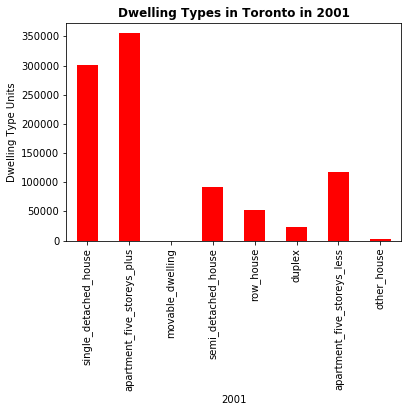

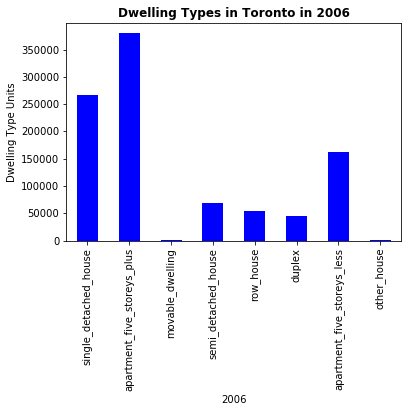

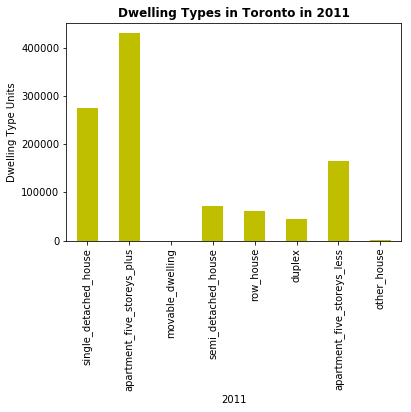

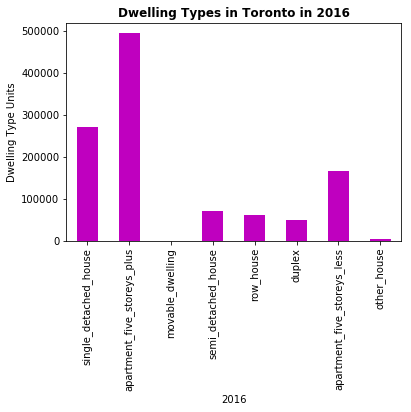

In [38]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    fig = plt.figure()
    data.plot(kind="bar", color = color, rot = 90)
    plt.title(title, fontdict={'fontsize': 12, 'fontweight': 'bold'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
# call function with input information to return the graphs
create_bar_chart(
    dwelling_types_per_year.iloc[0], 
    'Dwelling Types in Toronto in 2001', 
    '2001', 
    'Dwelling Type Units', 
    'r' 
)
create_bar_chart(
    dwelling_types_per_year.iloc[1], 
    'Dwelling Types in Toronto in 2006', 
    '2006', 
    'Dwelling Type Units', 
    'b' 
)
create_bar_chart(
    dwelling_types_per_year.iloc[2], 
    'Dwelling Types in Toronto in 2011', 
    '2011', 
    'Dwelling Type Units', 
    'y' 
)
create_bar_chart(
    dwelling_types_per_year.iloc[3], 
    'Dwelling Types in Toronto in 2016', 
    '2016', 
    'Dwelling Type Units', 
    'm' 
)


- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [39]:
# Calculate the average monthly shelter costs for owned and rented dwellings

avg_monthly_shelter = to_data[['shelter_costs_owned','shelter_costs_rented']].groupby('year').mean()
avg_monthly_shelter.head()


,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


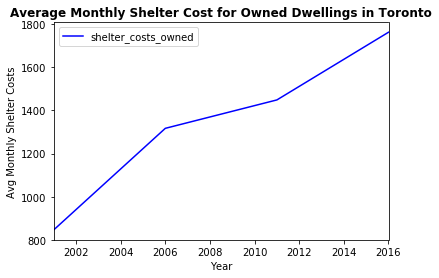

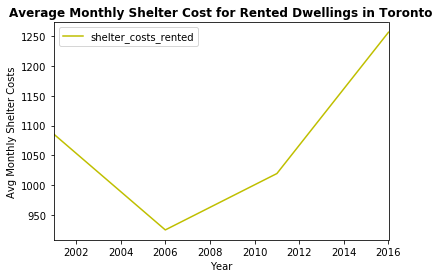

In [40]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    data.plot(kind="line", color = color)
    plt.title(title, fontdict={'fontsize': 12, 'fontweight': 'bold'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(
    avg_monthly_shelter.loc[:, ['shelter_costs_owned']], 
    "Average Monthly Shelter Cost for Owned Dwellings in Toronto",
    "Year",
    "Avg Monthly Shelter Costs",
    "b"
)  

# Line chart for rented dwellings
create_line_chart(
    avg_monthly_shelter.loc[:, ['shelter_costs_rented']],
    "Average Monthly Shelter Cost for Rented Dwellings in Toronto",
    "Year",
    "Avg Monthly Shelter Costs",
    "y"
)


## Average House Value per Year

In [41]:
# Calculate the average house value per year
avg_house_value = to_data[['average_house_value']].groupby('year').mean()
avg_house_value

,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


Text(0, 0.5, 'Avg. House Value')

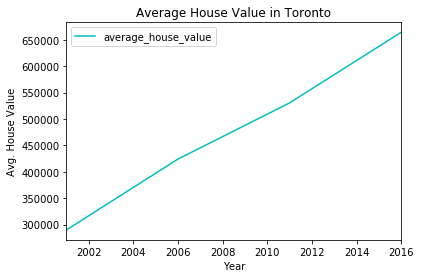

In [42]:
# Plot the average house value per year as a line chart
#fig = plt.figure()
avg_house_value.plot(kind = "line", color = 'c', title = "Average House Value in Toronto")
plt.xlabel("Year")
plt.ylabel("Avg. House Value")


- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [43]:
# Create a new DataFrame with the mean house values by neighbourhood per year
avg_house_values_neighbourhood = to_data[['neighbourhood','average_house_value']].groupby(['year','neighbourhood']).mean()

avg_house_values_neighbourhood.reset_index().head()


,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864


In [44]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
avg_house_values_neighbourhood.hvplot.line(groupby='neighbourhood', xlabel = "Year", ylabel = "Avg. House Value")


:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean number of dwelling types for each year and neighbourhood.

In [45]:
# Fetch the data of all dwelling types per year

data_per_year_per_neighbourhood = to_data.groupby(['year','neighbourhood']).mean()
dwelling_per_year_per_neighbourhood = data_per_year_per_neighbourhood.drop(
    columns=['average_house_value','shelter_costs_owned','shelter_costs_rented']).copy()
dwelling_per_year_per_neighbourhood.reset_index(inplace=True)
dwelling_per_year_per_neighbourhood.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2,2001,Alderwood,3175,315,0,470,50,185,370,0
3,2001,Annex,1060,6090,5,1980,605,275,3710,165
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0


In [46]:
dwelling_per_year_per_neighbourhood.set_index('year', inplace = True)

In [47]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood

dwelling_per_year_per_neighbourhood.hvplot.bar(
    groupby='neighbourhood', 
    rot = 90, 
    frame_height = 250, 
    frame_width=500, 
    xlabel="Year", 
    ylabel = "Dwelling Type Units"
)


:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [48]:
# Getting the data from the top 10 expensive neighbourhoods
# select the neighbourhood and average house value columns
neighbourhood_data = to_data.reset_index()

# Drop column Year
clean_neighbourhood_data = neighbourhood_data.drop(columns = ['year'])
# Sort by neighbourhood
clean_neighbourhood_data = clean_neighbourhood_data.sort_values(['neighbourhood'])

In [49]:
# Groupby neighbourhood to calculate average house price per neighbourhood
average_neighbourhood_data = clean_neighbourhood_data.groupby(['neighbourhood']).mean()

# Sort descending by average house value
high_average_neighbourhood_data = average_neighbourhood_data.sort_values(['average_house_value'], ascending=False)
top10_neighbourhoods = high_average_neighbourhood_data.reset_index()
top10_neighbourhoods_value = top10_neighbourhoods.nlargest(10, 'average_house_value')



In [50]:
# Select top 10 neighbourhoods based on average_house_value
top10_neighbourhoods_value = top10_neighbourhoods_value.iloc[:, [0,9]]
top10_neighbourhoods_value

,neighbourhood,average_house_value
0,Bridle Path-Sunnybrook-York Mills,1526485.75
1,Forest Hill South,1195992.50
2,Lawrence Park South,1094027.75
3,Rosedale-Moore Park,1093640.00
4,St.Andrew-Windfields,999107.00
5,Casa Loma,981064.25
6,Bedford Park-Nortown,930415.25
7,Forest Hill North,851680.50
8,Kingsway South,843234.25
9,Yonge-St.Clair,813220.25


In [51]:
# Ploy top expensive neighbourhoods in To
top10_neighbourhoods_value.hvplot.bar(
    title = "Top 10 Expensive Neighbourhoods in Toronto", 
    ylabel = "Avg. House Value", 
    xlabel = "Neighbourhood", 
    frame_height = 250, 
    frame_width=500, 
    rot=90
)

:Bars   [index]   (average_house_value)

- - - 

## Cost Analysis

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [52]:
neighbourhood_value_per_year = to_data.sort_values(['year','neighbourhood'])
neighbourhood_value_per_year.head()



,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


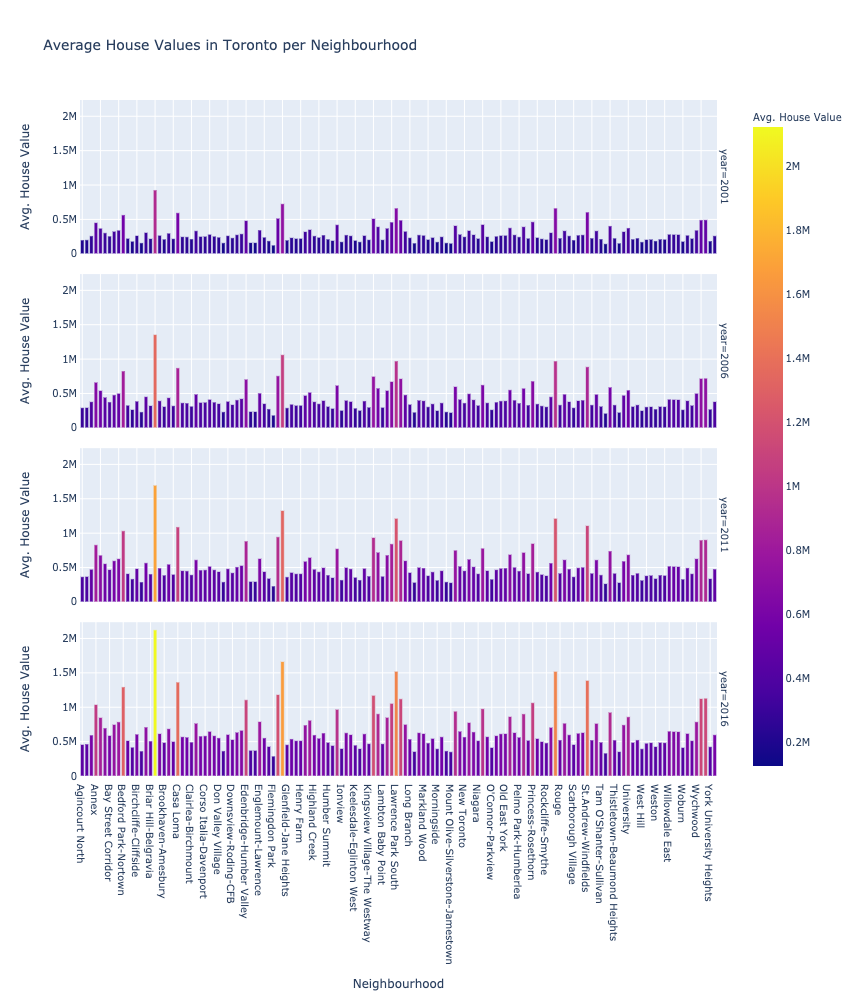

In [53]:
neighbourhood_value_peryear_plot = neighbourhood_value_per_year.reset_index()

# Create bar chart facet row to plot avg house values for all neighbourhoods


fig = px.bar(
    neighbourhood_value_peryear_plot,
    title="Average House Values in Toronto per Neighbourhood",
    x= "neighbourhood", 
    y= "average_house_value", 
    color= "average_house_value", 
    facet_row= "year",
    labels={"average_house_value": "Avg. House Value",
                     "neighbourhood": "Neighbourhood"},
    width = 1000,
    height = 1000,
)

fig.update_layout( 
    legend_title= "Avg. House Value",
    font = dict(size=10))
fig.show()


### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [54]:
# Fetch the data from all expensive neighbourhoods per year.
neighbourhood_value_sorted = neighbourhood_value_per_year.sort_values(['year','average_house_value'], ascending = False)

highest_neighbourhood_value = neighbourhood_value_sorted.groupby('year').head(10)

highest_neighbourhood_value = highest_neighbourhood_value[['neighbourhood', 'average_house_value', 'shelter_costs_owned','shelter_costs_rented']].reset_index()

highest_neighbourhood_value.head()


,year,neighbourhood,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2016,Bridle Path-Sunnybrook-York Mills,2124653,2903,2942
1,2016,Forest Hill South,1664653,2383,1486
2,2016,Lawrence Park South,1522732,2644,1515
3,2016,Rosedale-Moore Park,1522193,2498,1809
4,2016,St.Andrew-Windfields,1390616,2516,1565


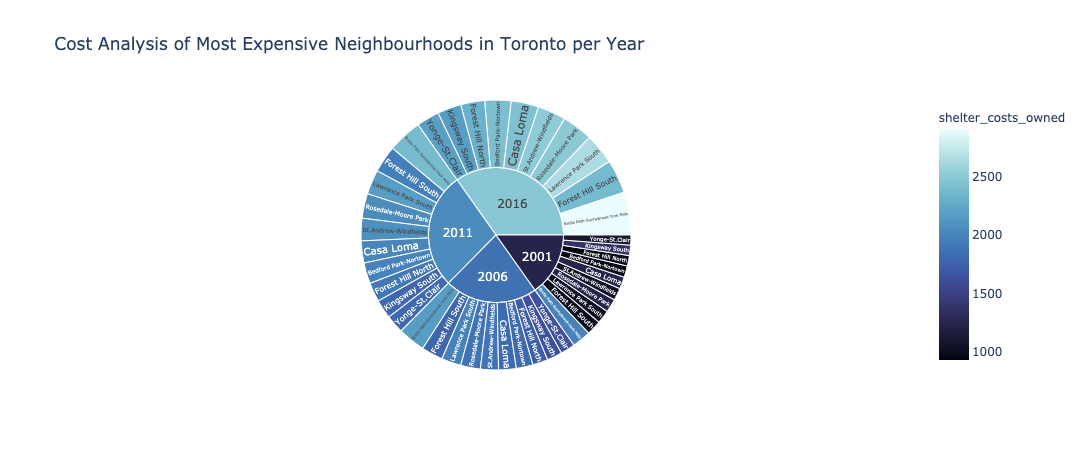

In [55]:
# Create the sunburst chart

fig =px.sunburst(
    highest_neighbourhood_value,
    path = ['year', 'neighbourhood'],
    hover_data = ['shelter_costs_rented'],
    values='average_house_value',
    color = 'shelter_costs_owned',
    color_continuous_scale = 'ice',
    title = 'Cost Analysis of Most Expensive Neighbourhoods in Toronto per Year'
)

fig.show()


- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [56]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()


,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


In [57]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [58]:
# Sort by neighbourhood
sorted_coordinates = df_neighbourhood_locations.sort_values(['neighbourhood']).set_index(['neighbourhood'])
sorted_coordinates.head()

,lat,lon
neighbourhood,,
Agincourt North,43.805441,-79.266712
Agincourt South-Malvern West,43.788658,-79.265612
Alderwood,43.604937,-79.541611
Annex,43.671585,-79.404001
Banbury-Don Mills,43.737657,-79.349718


In [59]:

# Merge the average neighbourhood prices data with coordinates
neighbourhood_coordinates = pd.concat(
    [sorted_coordinates, average_neighbourhood_data], axis = 1, join = "inner").reset_index()
neighbourhood_coordinates.head()


,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

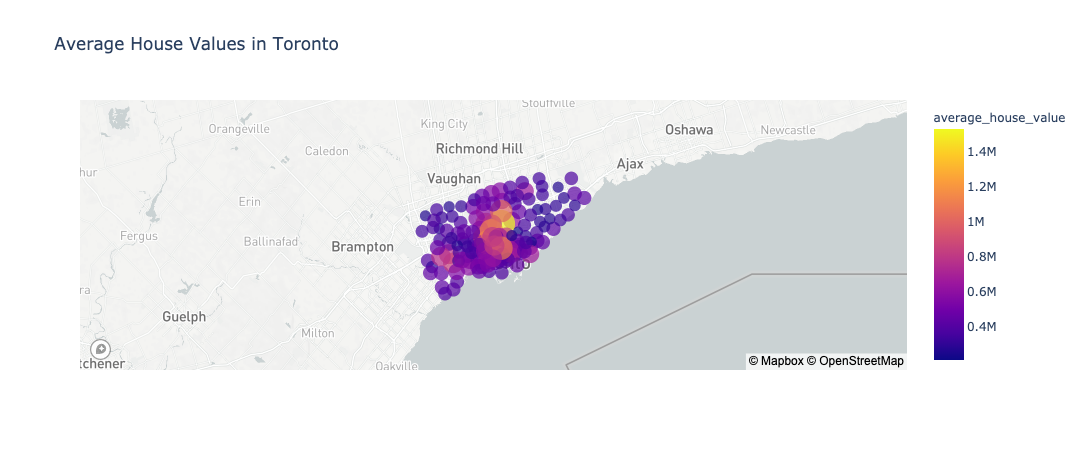

In [60]:
# Create a scatter mapbox to analyze neighbourhood info
# Plot Data
map = px.scatter_mapbox(
    neighbourhood_coordinates,
    lat= "lat",
    lon= "lon",
    title = "Average House Values in Toronto",
    color= "average_house_value",
    size= "average_house_value",
    hover_name = "neighbourhood",
    hover_data = ["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", 
                  "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", 
                  "other_house", "shelter_costs_owned", "shelter_costs_rented"],  
    zoom = 8
)

# Display the map
map.show()